In [1]:
# Compares review counts on weekends vs. weekdays & non-holidays vs. holidays
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn
seaborn.set()

# Getting data into a form we want
df = pd.read_csv('business_reviews_users_merged.csv')
df = df.drop(columns=['Unnamed: 0', 'is_open', 'business_stars', 'business_review_count', 'review_stars', 'average_stars','elite', 'user_review_count'])
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.strftime('%Y-%m-%d')
dates = df['date'].str.split('-').str[0].astype(int)
df.date = pd.to_datetime(df.date)
df = df[dates > 2015]
df['day'] = df.date.dt.dayofweek

In [2]:
def grouper(df1, df2): # Groups the two provided dfs by their dates with corresponding review count
    g1 = df1.groupby(['date']).count()
    g1 = g1.drop(columns=['business_id', 'business_name', 'review_id', 'username', 'day'])
    g1 = g1.rename(columns={'user_id': 'review_count'})

    g2 = df2.groupby(['date']).count()
    g2 = g2.drop(columns=['business_id', 'business_name', 'review_id', 'username', 'day'])
    g2 = g2.rename(columns={'user_id': 'review_count'})
    
    return g1.review_count, g2.review_count

In [3]:
# --Weekend vs Weekday Analysis--
weekdays = df[df.day < 5]
weekends = df[df.day >= 5]

# What if the user leaves a review the day after his/her visit?
# Below accounts for this by shifting i.e. taking weekdays = days [1,5], and weekends = days [7,0]
# We refer to these as the "adjusted values"
weekdays_adjusted = df[(df.day > 0) & (df.day < 6)] 
weekends_adjusted = df[(df.day == 0) | (df.day == 6)]

In [4]:
# Weekends vs weekdays stats
x, y = grouper(weekdays, weekends)
ttest_p = stats.ttest_ind(x,y).pvalue 
weekday_normality_p = stats.normaltest(x).pvalue
weekend_normality_p = stats.normaltest(y).pvalue
variance_p = stats.levene(x,y).pvalue

weekday_tot = x.sum()
weekend_tot = y.sum()
weekday_avg = x.sum()/x.size
weekend_avg = y.sum()/y.size

# Adjusted weekends vs weekdays stats
x2, y2 = grouper(weekdays_adjusted, weekends_adjusted)
adjusted_ttest_p = stats.ttest_ind(x2,y2).pvalue 
adjusted_weekday_normality_p = stats.normaltest(x2).pvalue
adjusted_weekend_normality_p = stats.normaltest(y2).pvalue
adjusted_variance_p = stats.levene(x2,y2).pvalue

adjusted_weekday_tot = x2.sum()
adjusted_weekend_tot = y2.sum()
adjusted_weekday_avg = x2.sum()/x2.size
adjusted_weekend_avg = y2.sum()/y2.size

Unadjusted Weekday vs. Weekend Statistics

T-test p-value: 2.614535372825658e-77
Weekday normality p-value 0.001808450734127155
Weekend normality p-value 0.9763305328376436
Equal variance p-value 0.041961645836085436
Total weekday reviews vs weekend reviews: 116399 vs. 58503
Per-day average weekday reviews vs weekend reviews: 112.89912706110572 vs. 141.99757281553397


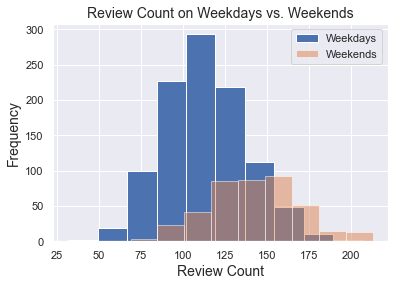

In [5]:
print('Unadjusted Weekday vs. Weekend Statistics')
print('')
print('T-test p-value:', ttest_p)
print('Weekday normality p-value', weekday_normality_p)
print('Weekend normality p-value', weekend_normality_p)
print('Equal variance p-value', variance_p)
print('Total weekday reviews vs weekend reviews:', weekday_tot, 'vs.', weekend_tot)
print('Per-day average weekday reviews vs weekend reviews:', weekday_avg, 'vs.', weekend_avg)

plt.title('Review Count on Weekdays vs. Weekends', fontsize=14)
plt.xlabel('Review Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.hist(x, label='Weekdays')
plt.hist(y, alpha=.5, label='Weekends')
plt.legend(loc="upper right")
plt.show()

Adjusted Weekday vs. Weekend Statistics

T-test p-value: 7.652841650031118e-66
Weekday normality p-value 0.008223832471202043
Weekend normality p-value 0.6455834161128771
Equal variance p-value 0.0007033813944209473
Total weekday reviews vs weekend reviews: 117007 vs. 57895
Per-day average weekday reviews vs weekend reviews: 113.48884578079534 vs. 140.52184466019418


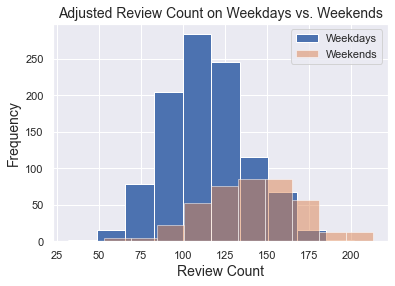

In [6]:
print('Adjusted Weekday vs. Weekend Statistics')
print('')
print('T-test p-value:', adjusted_ttest_p)
print('Weekday normality p-value', adjusted_weekday_normality_p)
print('Weekend normality p-value', adjusted_weekend_normality_p)
print('Equal variance p-value', adjusted_variance_p)
print('Total weekday reviews vs weekend reviews:', adjusted_weekday_tot, 'vs.', adjusted_weekend_tot)
print('Per-day average weekday reviews vs weekend reviews:', adjusted_weekday_avg, 'vs.', adjusted_weekend_avg)

plt.title('Adjusted Review Count on Weekdays vs. Weekends', fontsize=14)
plt.xlabel('Review Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.hist(x2, label='Weekdays')
plt.hist(y2, alpha=.5, label='Weekends')
plt.legend(loc="upper right")
plt.show()

In [7]:
# --Non-Holiday vs. Holiday Analysis--

# List of stat holidays in Ontario (2016-2019)
holidaylist = ['2016-01-01', '2016-02-15', '2016-03-25', '2016-05-23', 
               '2016-07-01', '2016-08-01', '2016-09-05', '2016-10-10', 
               '2016-12-25', '2016-12-26', '2017-01-01', '2017-02-20',
               '2017-04-14', '2017-05-22', '2017-07-01', '2017-08-07',
               '2017-09-04', '2017-10-09', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-02-19', '2018-03-30', '2018-05-21',
               '2018-07-02', '2018-08-06', '2018-09-03', '2018-10-08',
               '2018-12-25', '2018-12-26', '2019-01-01', '2019-02-18',
               '2019-04-19', '2019-05-20', '2019-07-01', '2019-08-05',
               '2019-09-02', '2019-10-14', '2019-12-25', '2019-12-26']
holidays = df[df.date.isin(holidaylist)]
non_holidays = df[df.date.isin(holidaylist) == 0]

# Adjusted values
adjusted_dates = holidays.date + timedelta(days=1)
adjusted_holidays = df[df.date.isin(adjusted_dates)]
adjusted_non_holidays = df[df.date.isin(adjusted_dates) == 0]

In [8]:
# Holidays vs non-holidays stats
x3, y3 = grouper(non_holidays, holidays)
ttest_p2 = stats.ttest_ind(x3,y3).pvalue 
non_holiday_normality_p = stats.normaltest(x3).pvalue
holiday_normality_p = stats.normaltest(y3).pvalue
variance_p2 = stats.levene(x3,y3).pvalue

non_holiday_tot = x3.sum()
holiday_tot = y3.sum()
non_holiday_avg = x3.sum()/x3.size
holiday_avg = y3.sum()/y3.size

# Adjusted holidays vs non-holidays stats
x4, y4 = grouper(adjusted_non_holidays, adjusted_holidays)
adjusted_ttest_p2 = stats.ttest_ind(x4,y4).pvalue 
adjusted_non_holiday_normality_p = stats.normaltest(x4).pvalue
adjusted_holiday_normality_p = stats.normaltest(y4).pvalue
adjusted_variance_p2 = stats.levene(x4,y4).pvalue

adjusted_non_holiday_tot = x4.sum()
adjusted_holiday_tot = y4.sum()
adjusted_non_holiday_avg = x4.sum()/x4.size
adjusted_holiday_avg = y4.sum()/y4.size

Unadjusted Non-Holiday vs. Holiday Statistics

T-test p-value: 0.09812562321453898
Non-holiday normality p-value 7.605233084999783e-06
Holiday normality p-value 0.4376608277989765
Equal variance p-value 0.002604893756550588
Total non-holiday reviews vs holiday reviews: 170010 vs. 4892
Per-day average non-holiday reviews vs holiday reviews: 121.00355871886121 vs. 128.73684210526315


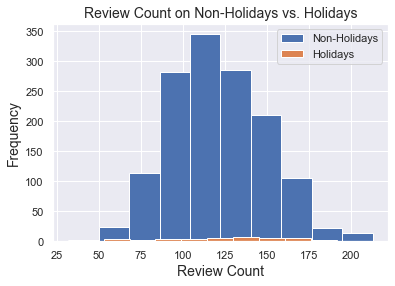

In [9]:
print('Unadjusted Non-Holiday vs. Holiday Statistics')
print('')
print('T-test p-value:', ttest_p2)
print('Non-holiday normality p-value', non_holiday_normality_p)
print('Holiday normality p-value', holiday_normality_p)
print('Equal variance p-value', variance_p2)
print('Total non-holiday reviews vs holiday reviews:', non_holiday_tot, 'vs.', holiday_tot)
print('Per-day average non-holiday reviews vs holiday reviews:', non_holiday_avg, 'vs.', holiday_avg)

plt.title('Review Count on Non-Holidays vs. Holidays', fontsize=14)
plt.xlabel('Review Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.hist(x3, label='Non-Holidays')
plt.hist(y3, label='Holidays')
plt.legend(loc="upper right")
plt.show()

Adjusted Non-Holiday vs. Holiday Statistics

T-test p-value: 0.9901985026396526
Non-holiday normality p-value 1.014029109606058e-05
Holiday normality p-value 0.283108398538804
Equal variance p-value 0.25595630811592773
Total non-holiday reviews vs holiday reviews: 170294 vs. 4608
Per-day average non-holiday reviews vs holiday reviews: 121.20569395017793 vs. 121.26315789473684


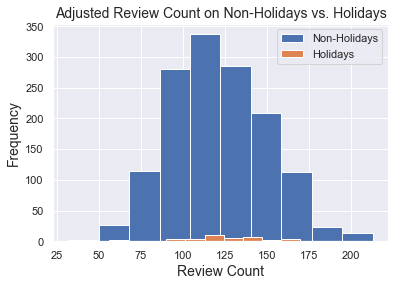

In [10]:
print('Adjusted Non-Holiday vs. Holiday Statistics')
print('')
print('T-test p-value:', adjusted_ttest_p2)
print('Non-holiday normality p-value', adjusted_non_holiday_normality_p)
print('Holiday normality p-value', adjusted_holiday_normality_p)
print('Equal variance p-value', adjusted_variance_p2)
print('Total non-holiday reviews vs holiday reviews:', adjusted_non_holiday_tot, 'vs.', adjusted_holiday_tot)
print('Per-day average non-holiday reviews vs holiday reviews:', adjusted_non_holiday_avg, 'vs.', adjusted_holiday_avg)

plt.title('Adjusted Review Count on Non-Holidays vs. Holidays', fontsize=14)
plt.xlabel('Review Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.hist(x4, label='Non-Holidays')
plt.hist(y4, label='Holidays')
plt.legend(loc="upper right")
plt.show()